# PHYS 447B: Orbital Mechanics
## Homework 3

Shelby Quiring, 10157162, Jan 25th 2023

Questions: 3.3, 3.6, 3.13

In [3]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt

### `Question 3.3`

A satellite is in earth orbit for which perigee altitude is 200 km and apogee altitude is 600 km. Find the time interval during which the satellite remains above an altitude of 400 km.

{Ans.: 47.15 min}

#### Answer 3.3

We solve for the time above 400km be solving for the times when the orbit is exactly 400km. For this we use Equation 3.2:

\begin{equation}
t = \frac{h^3}{\mu^2} \int_{0}^{\theta} \frac{d\phi}{1 + e \cos{\phi}}
\end{equation}

This requires that we first find the eccentricity, which can be done with Equation 2.74:

\begin{equation}
e = \frac{r_a - r_p}{r_a + r_p}
\end{equation}

Since Equation 3.2 is in terms of angular position, we must also use Equation 2.35 to relate altitude to angular position.

\begin{equation}
r = \frac{h^2}{\mu} \frac{1}{1 + e\cos{\theta}}
\end{equation}

Finally to use this equation we must express h, which can be calculated from velocity, which can be calculated from Equation 2.71:

\begin{gather}
\frac{v^2}{2} - \frac{\mu}{r} = -\frac{\mu}{2a} \\
\therefore v = \sqrt{2 \mu (\frac{1}{r} -\frac{1}{2a}) } \\
\therefore h = r \times v
\end{gather}

Duration above 400km: 46.09 mins


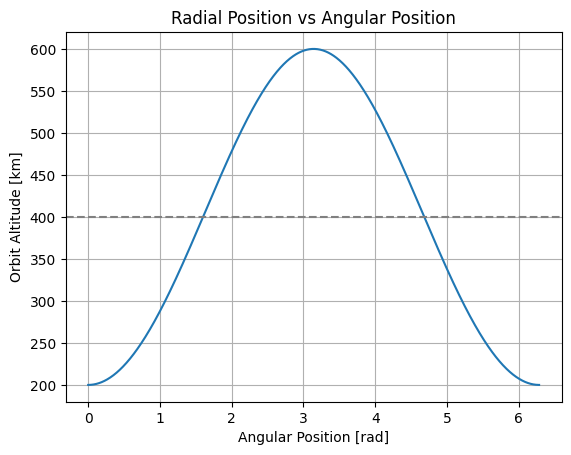

In [46]:
# Answer 3.3

# Inputs
Re = 6371e3 # m, Earth radius
Me = 5.97e24 # kg, Earth mass
G = 6.67e-11 # Gravitational constant

ra = 600e3 + Re # Apogee position, m
rp = 200e3 + Re # Perigee position, m

mu = G*Me

# Calculate eccentricity
e = (ra - rp) / (ra + rp)

# Calculate angular momentum
a = (ra + rp) / 2
v = np.sqrt(2 * mu * (1/rp - 1/(2*a)))
h = rp * v 

# Define theta vector
thetavec = np.linspace(0, 2*np.pi, 1000)
position = h**2 / mu * (1/(1 + e*np.cos(thetavec)))

# Determine angular position where altitude crosses 400km

interval = position-Re > 400e3

start = np.min(np.where(interval==True))
end = np.max(np.where(interval==True))

integrand = 1/(1 + e*np.cos(thetavec)) * h**3/mu**2
integrand_above = integrand[interval]
theta_above = thetavec[interval]

t1 = np.trapz(integrand[0:start], x=thetavec[0:start])
t2 = np.trapz(integrand[0:end], x=thetavec[0:end])

# Report duration
print(f'Duration above 400km: {np.round((t2 - t1)/60, 2)} mins')

# Plot results
fig, ax = plt.subplots()

ax.plot(thetavec, (position - Re)*1e-3)
ax.axhline(400, linestyle='--', color='0.5')
ax.grid('enable')
ax.set_title('Radial Position vs Angular Position')
ax.set_xlabel('Angular Position [rad]')
ax.set_ylabel('Orbit Altitude [km]')
plt.show()




### `Question 3.8`

A satellite in earth orbit has perigee and apogee radii of rp = 7000 km and ra = 14 000 km,
respectively. Find its true anomaly 30 minutes after passing true anomaly of 60◦.

{Ans.: 127◦}

#### Answer 3.8

To solve this problem, we numerically interate time since perigee.

In [59]:
# Answer 3.8

from scipy.integrate import cumtrapz

# Inputs
Re = 6371e3 # m, Earth radius
Me = 5.97e24 # kg, Earth mass
G = 6.67e-11 # Gravitational constant

initial_angle = 60 * np.pi / 180 # [rad]
delay = 30 * 60 # s

ra = 14000e3 # Apogee position, m
rp = 7000e3 # Perigee position, m

mu = G*Me

# Calculate eccentricity
e = (ra - rp) / (ra + rp)

# Calculate angular momentum
a = (ra + rp) / 2
v = np.sqrt(2 * mu * (1/rp - 1/(2*a)))
h = rp * v 

# Define theta vector
thetavec = np.linspace(0, 2*np.pi, 1000)
position = h**2 / mu * (1/(1 + e*np.cos(thetavec)))
integrand = 1/(1 + e*np.cos(thetavec)) * h**3/mu**2
time = cumtrapz(integrand, x=thetavec)

start_index = np.min(np.where(thetavec > initial_angle))
end_index = np.min(np.where(time > (time[start_index] + delay)))

true_anomaly = thetavec[end_index] * 180 / np.pi
print(f'True Anomaly after 30mins: {np.round(true_anomaly, 2)} deg')



True Anomaly after 30mins: 129.73 deg


### `Question 3.13`

Calculate the time required for a spacecraft launched into a parabolic trajectory at a perigee altitude of 500 km to leave the earth’s sphere of influence (see Table A.2).

{Ans.: 7 d 18 hr 34 min}

#### Answer 3.13

From Table A.2, the Sphere of Influence radius for Earth is 925000 km. We once again integrate the time since perigee to the point where the spacecraft has exceeded this radius.

Time to exit SoI: 8.83 Hours


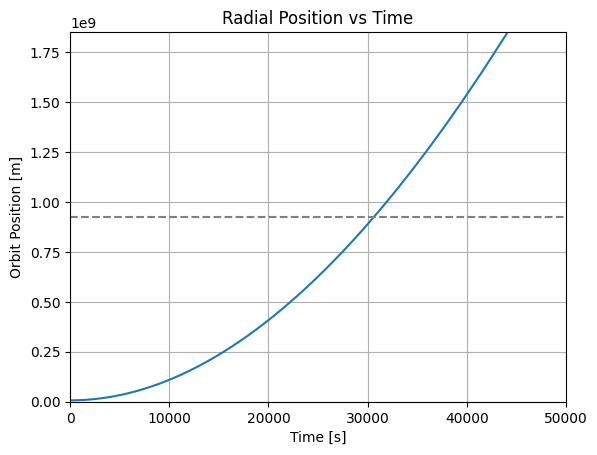

In [95]:
# Answer 3.13

from scipy.integrate import cumtrapz

# Inputs
Re = 6371e3 # m, Earth radius
Me = 5.97e24 # kg, Earth mass
G = 6.67e-11 # Gravitational constant
SOI = 925000e3 # Sphere of influence, m
e = 1 # Parabolic

altitude_p = 500e3 # Perigee altitude, m

rp = altitude_p + Re # Perigee position, m

mu = G*Me

# Calculate angular momentum
v = np.sqrt(2 * mu * (1/rp))
h = rp * v 

# Define theta vector
thetavec = np.linspace(0, 2*np.pi, 1000)
position = h**2 / mu * (1/(1 + e*np.cos(thetavec)))
integrand = 1/(1 + e*np.cos(thetavec)) * h**3/mu**2
time = cumtrapz(integrand, x=thetavec)

exit_index = np.min(np.where(position > SOI))

duration = time[exit_index]

print(f'Time to exit SoI: {np.round(duration/3600, 2)} Hours')

# Plot results
fix, ax = plt.subplots()

ax.plot(time, position[0:-1])
ax.axhline(SOI, linestyle='--', color='0.5')

ax.set_xlim([0, 50000])
ax.set_ylim([0, 2*SOI])

ax.grid('enable')
ax.set_title('Radial Position vs Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Orbit Position [m]')
plt.show()


plt.show()



# Answer does not agree